In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joypy
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerBase

In [2]:
#ref: https://stackoverflow.com/questions/55501860/how-to-put-multiple-colormap-patches-in-a-matplotlib-legend

class HandlerColormap(HandlerBase):
    def __init__(self, cmap, num_stripes=8, **kw):
        HandlerBase.__init__(self, **kw)
        self.cmap = cmap
        self.num_stripes = num_stripes
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        stripes = []
        for i in range(self.num_stripes):
            s = Rectangle([xdescent + i * width / self.num_stripes, ydescent],
                          width / self.num_stripes,
                          height,
                          fc=self.cmap((2 * i + 1) / (2 * self.num_stripes)),
                          transform=trans)
            stripes.append(s)
        return stripes

cmaps = [plt.cm.Blues_r, plt.cm.Reds_r]
custom_colors = np.concatenate((cmaps[0](np.linspace(0,1,9)), cmaps[1](np.linspace(0,1,5))), axis=0)
custom_cmap = mcolors.ListedColormap(custom_colors)

In [3]:
time_df = pd.DataFrame(columns=["created_at"])
metadata_file = "../../rs_usage/metadata/metadata.csv"
metadata = pd.read_csv(metadata_file, low_memory=False)
release_file = "../../rs_usage/info_repos/release_number/release_number.csv"
time_df["release"] = pd.read_csv(release_file, low_memory=False)["url"]
time_df["forks"] = metadata["forks_count"]
time_df["stars"] = metadata["stargazers_count"]

time_df["created_at"] = pd.to_datetime(metadata['created_at'], format='%Y-%m-%dT%H:%M:%SZ')
time_df["year"] = time_df["created_at"].apply(lambda x: x.year)

time_df_cleaned = time_df[~time_df["year"].isin([2023, 2024])]

In [6]:
time_df_cleaned.loc[:, "forks"] = time_df_cleaned["forks"].clip(upper=10)
time_df_cleaned.loc[:, "stars"] = time_df_cleaned["stars"].clip(upper=10)
time_df_cleaned.loc[:, "release"] = time_df_cleaned["release"].clip(upper=10)

# Forks

In [57]:
metric = "forks"

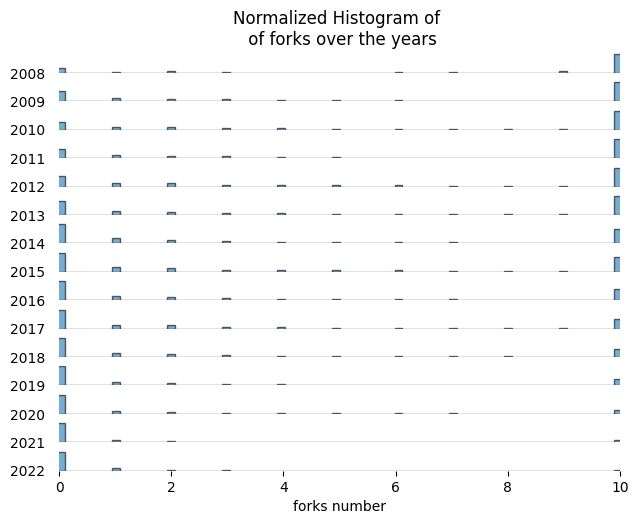

In [26]:
fig, axes = joypy.joyplot(time_df_cleaned, column=metric, by="year", overlap=0, bins=100, hist=True,
                          colormap=custom_colors, alpha=0.6, ylim="own")


for a in axes:
    a.set_xlim([0,10])
axes[-1].set_xlabel(f"{metric} number")
axes[-1].set_title(f"Normalized Histogram of \n of {metric} over the years")
plt.savefig(f"../figures/hist_{metric}_time.png")

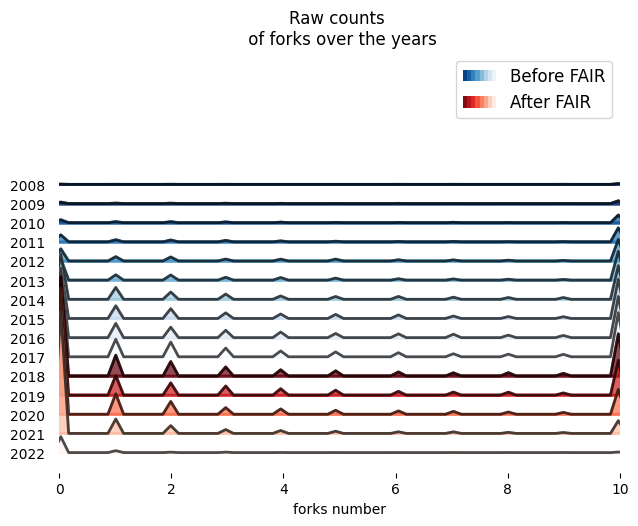

In [59]:
fig, axes = joypy.joyplot(time_df_cleaned, column=metric, by="year", overlap=2, bins=100,
                          kind="counts", colormap=custom_cmap, alpha=0.7, linewidth=2)
for a in axes:
    a.set_xlim([0,10])


cmap_labels = ["Before FAIR", "After FAIR"]
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles,
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
plt.legend(handles=cmap_handles,
           labels=cmap_labels,
           handler_map=handler_map,
           fontsize=12)

axes[-1].set_xlabel(f"{metric} number")
axes[-1].set_title(f"Raw counts \n of {metric} over the years")

plt.savefig(f"../figures/counts_{metric}_time.png")

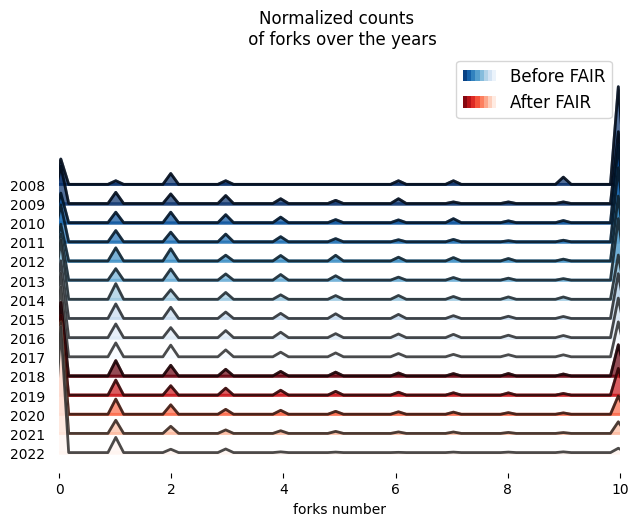

In [27]:
fig, axes = joypy.joyplot(time_df_cleaned, column=metric, by="year", overlap=2, bins=100,
                          kind="normalized_counts", colormap=custom_cmap, alpha=0.7, linewidth=2)
for a in axes:
    a.set_xlim([0,10])


cmap_labels = ["Before FAIR", "After FAIR"]
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles,
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
plt.legend(handles=cmap_handles,
           labels=cmap_labels,
           handler_map=handler_map,
           fontsize=12)

axes[-1].set_xlabel(f"{metric} number")
axes[-1].set_title(f"Normalized counts \n of {metric} over the years")

plt.savefig(f"../figures/counts_{metric}_time.png")

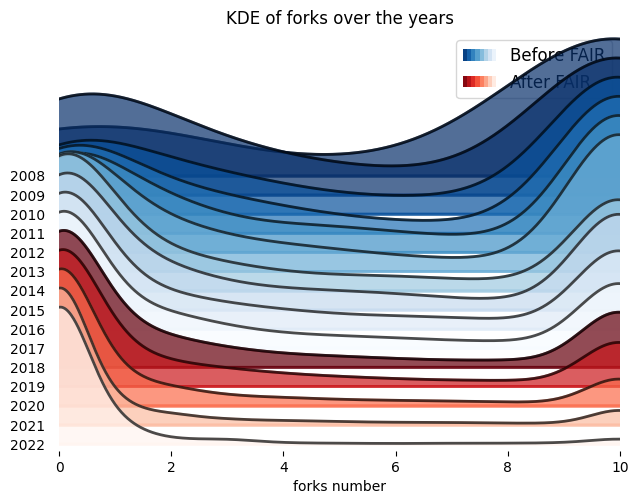

In [28]:
fig, axes = joypy.joyplot(time_df_cleaned, column=metric,  by="year", overlap=2, bins=200, ylim="own",
                           colormap=custom_cmap, alpha=0.7, linewidth=2)

cmap_labels = ["Before FAIR", "After FAIR"]
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles,
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
plt.legend(handles=cmap_handles,
           labels=cmap_labels,
           handler_map=handler_map,
           fontsize=12)

for a in axes:
    a.set_xlim([0,10])
axes[-1].set_xlabel(f"{metric} number")
axes[-1].set_title(f"KDE of {metric} over the years")
plt.savefig(f"../figures/KDE_{metric}_time.png")

# Stars

In [54]:
metric = "stars"

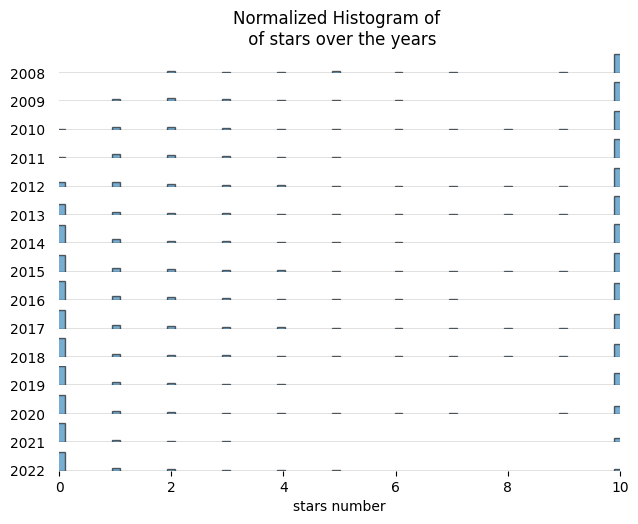

In [55]:
fig, axes = joypy.joyplot(time_df_cleaned, column=metric, by="year", overlap=0, bins=100, hist=True,
                          colormap=custom_colors, alpha=0.6, ylim="own")
for a in axes:
    a.set_xlim([0,10])
axes[-1].set_xlabel(f"{metric} number")
axes[-1].set_title(f"Normalized Histogram of \n of {metric} over the years")

plt.savefig(f"../figures/hist_{metric}_time.png")

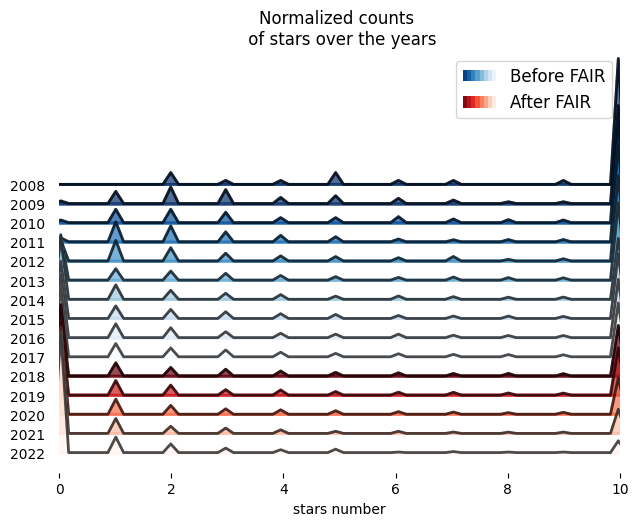

In [48]:
fig, axes = joypy.joyplot(time_df_cleaned, column=metric, by="year", overlap=2, bins=100,
                          kind="normalized_counts", colormap=custom_cmap, alpha=0.7, linewidth=2)
for a in axes:
    a.set_xlim([0,10])


cmap_labels = ["Before FAIR", "After FAIR"]
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles,
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
plt.legend(handles=cmap_handles,
           labels=cmap_labels,
           handler_map=handler_map,
           fontsize=12)

axes[-1].set_xlabel(f"{metric} number")
axes[-1].set_title(f"Normalized counts \n of {metric} over the years")

plt.savefig(f"../figures/counts_{metric}_time.png")

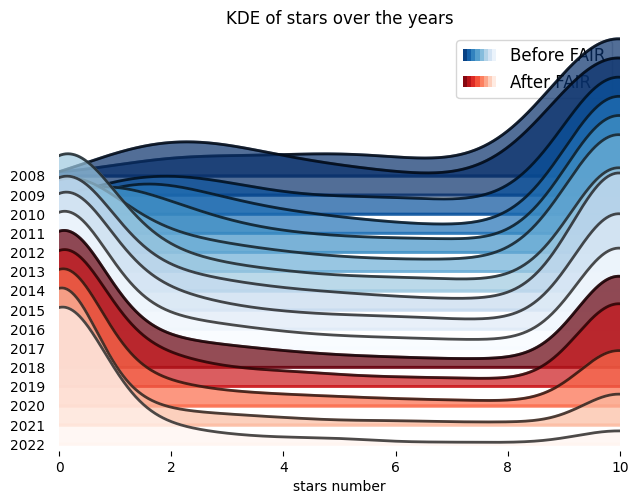

In [49]:
fig, axes = joypy.joyplot(time_df_cleaned, column=metric,  by="year", overlap=2, bins=200, ylim="own",
                           colormap=custom_cmap, alpha=0.7, linewidth=2)

cmap_labels = ["Before FAIR", "After FAIR"]
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles,
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
plt.legend(handles=cmap_handles,
           labels=cmap_labels,
           handler_map=handler_map,
           fontsize=12)

for a in axes:
    a.set_xlim([0,10])
axes[-1].set_xlabel(f"{metric} number")
axes[-1].set_title(f"KDE of {metric} over the years")
plt.savefig(f"../figures/KDE_{metric}_time.png")

# Releases

In [50]:
metric = "release"

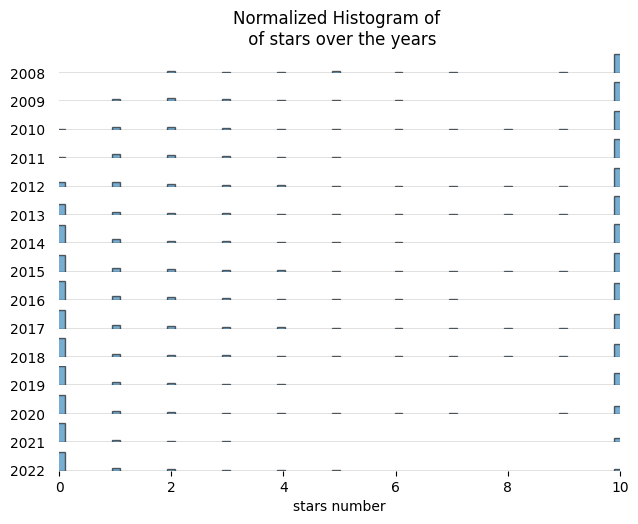

In [56]:
fig, axes = joypy.joyplot(time_df_cleaned, column=metric, by="year", overlap=0, bins=100, hist=True,
                          colormap=custom_colors, alpha=0.6, ylim="own")
for a in axes:
    a.set_xlim([0,10])
axes[-1].set_xlabel(f"{metric} number")
axes[-1].set_title(f"Normalized Histogram of \n of {metric} over the years")

plt.savefig(f"../figures/hist_{metric}_time.png")

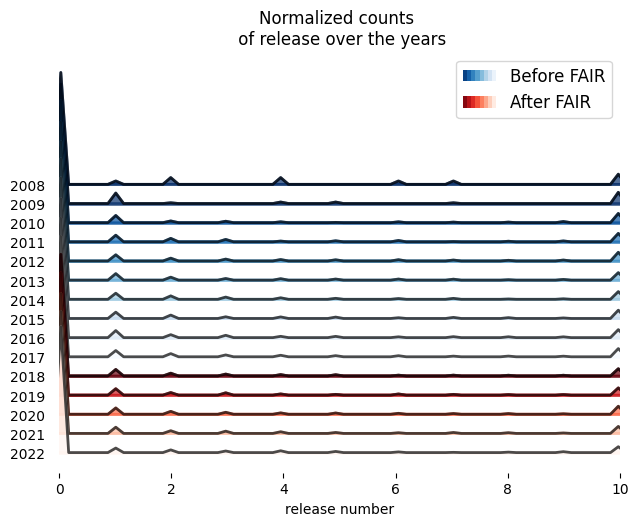

In [52]:
fig, axes = joypy.joyplot(time_df_cleaned, column=metric, by="year", overlap=2, bins=100,
                          kind="normalized_counts", colormap=custom_cmap, alpha=0.7, linewidth=2)
for a in axes:
    a.set_xlim([0,10])


cmap_labels = ["Before FAIR", "After FAIR"]
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles,
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
plt.legend(handles=cmap_handles,
           labels=cmap_labels,
           handler_map=handler_map,
           fontsize=12)

axes[-1].set_xlabel(f"{metric} number")
axes[-1].set_title(f"Normalized counts \n of {metric} over the years")

plt.savefig(f"../figures/counts_{metric}_time.png")

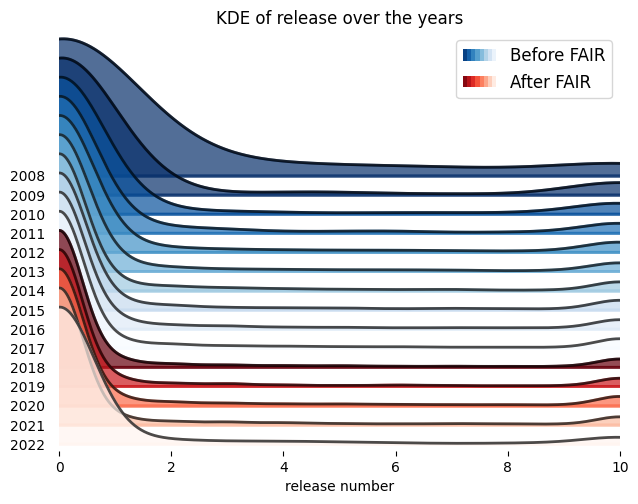

In [53]:
fig, axes = joypy.joyplot(time_df_cleaned, column=metric,  by="year", overlap=2, bins=200, ylim="own",
                           colormap=custom_cmap, alpha=0.7, linewidth=2)

cmap_labels = ["Before FAIR", "After FAIR"]
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles,
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
plt.legend(handles=cmap_handles,
           labels=cmap_labels,
           handler_map=handler_map,
           fontsize=12)

for a in axes:
    a.set_xlim([0,10])
axes[-1].set_xlabel(f"{metric} number")
axes[-1].set_title(f"KDE of {metric} over the years")
plt.savefig(f"../figures/KDE_{metric}_time.png")